# Author: Mayur Rajendrakumar Ghate
## Task - 1: Color Identification in Images (Level - Beginner)
## *Implement an image color detector which identifies all the colors in an image or video.*
## The Sparks Foundation
### Graduate Rotational Internship Program (GRIP) August 2021 Batch
### Computer Vision & Internet of Things

# Color Identification using Machine Learning

In this notebook, I have used machine learning algorithm, `KMeans`, to extract colors from a give image. I will use `OpenCV2` for image manipulation, apply `KMeans` to identify the major colors and then plot the information using `Matplotlib`.

**Import Necessary Libraries**

In [12]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import os
from skimage.color import rgb2lab, deltaE_cie76

In [13]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

**Let's first read a sample image and understand basic operations that we can do on it.**

The type of this input is <class 'numpy.ndarray'>
Shape: (444, 600, 3)


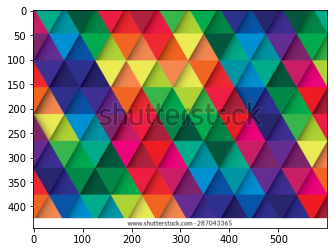

In [14]:
image = cv2.imread(r'F:\Mayur Ghate\Internship\Computer-Vision-main\image.webp')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

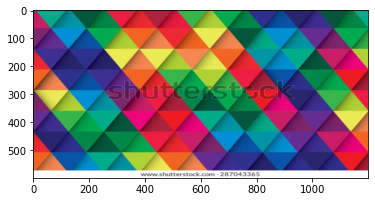

In [15]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# **Color Identification of the Selected Image**

In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [18]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_

    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([235.40776516, 184.1449517 , 130.6817481 ]),
 array([252.30278529, 251.78591676, 251.37955805]),
 array([134.23722072,  80.74373731, 147.50592417]),
 array([217.1279424 , 216.22634543,   4.05390935]),
 array([153.05284026, 191.01837239, 204.23970479]),
 array([212.99992099,  38.72438177,  60.59437465]),
 array([ 17.61120526, 145.26502841, 188.03997607]),
 array([ 84.62143076, 171.54221676,  66.07993041])]

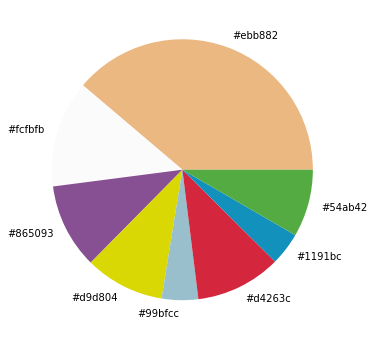

In [19]:

get_colors(get_image(r'F:\Mayur Ghate\Internship\Computer-Vision-main\image1.webp'), 8, True)

# **Searching Images using Color**

In [21]:
IMAGE_DIRECTORY = "F:\Mayur Ghate\Internship\Computer-Vision-main\img"
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
   
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

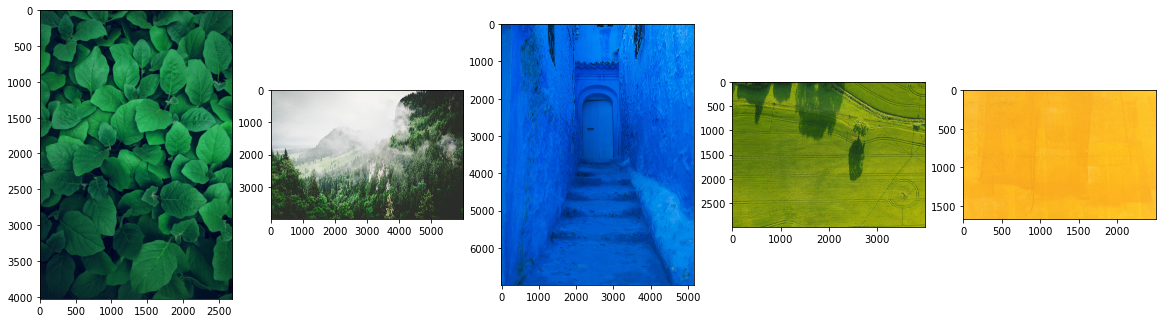

In [22]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [23]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [24]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

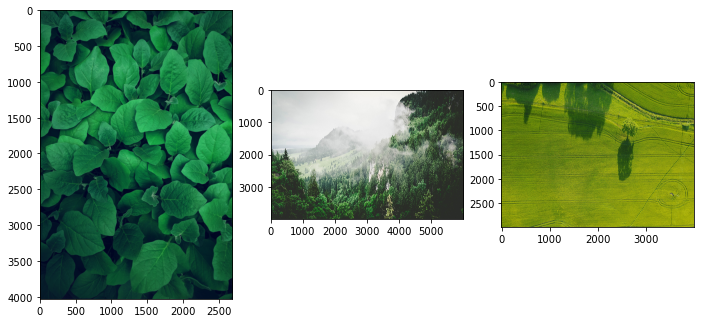

In [25]:

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

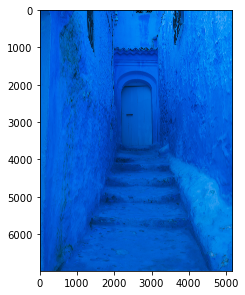

In [26]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

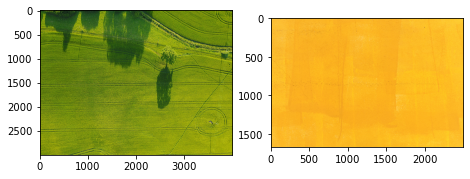

In [27]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

## Conclusion

In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.

## Thank You